In [1]:
%reload_ext mocodo

Mocodo 3.2.1 loaded.


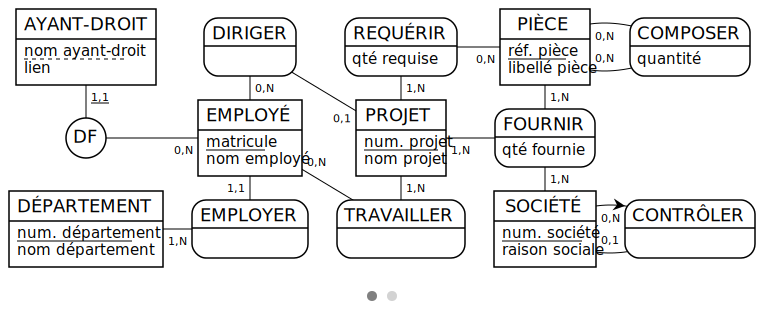

In [2]:
%%mocodo
% MCD d'accueil
% Un petit zoo de la syntaxe de Mocodo, avec quelques fonctionnalités :
% - de base : entité, association, attribut, identifiant, cardinalité, patte ;
% - sur les entités : forte, faible (AYANT-DROIT) ;
% - sur les associations : binaire, ternaire (FOURNIR), réflexive arborescente
%  (CONTRÔLER) ou pas (COMPOSER), de dépendance fonctionnelle (DF, EMPLOYER) ;
%  rôle des pattes (CONTRÔLER et COMPOSER), flèche, contrainte (I) ;
% - visuelles : dévoilement graduel, explications interactives (survolez les
%  cardinalités des associations réflexives ou la contrainte d'inclusion).
% 
% MCD adapté de : The entity-relationship model—toward a unified view of data
% (Chen, 1976).

AYANT-DROIT: nom ayant-droit, lien
DIRIGER, 0N EMPLOYÉ, 01 PROJET
REQUÉRIR, 1N PROJET, 0N PIÈCE: qté requise
PIÈCE: réf. pièce, libellé pièce
COMPOSER, 0N [composée] PIÈCE, 0N [composante] PIÈCE: quantité

DF1, _11 AYANT-DROIT, 0N EMPLOYÉ
EMPLOYÉ: matricule, nom employé
PROJET: num. projet, nom projet
FOURNIR, 1N PROJET, 1N PIÈCE, 1N SOCIÉTÉ: qté fournie

DÉPARTEMENT: num. département, nom département
EMPLOYER, 11 EMPLOYÉ, 1N DÉPARTEMENT
TRAVAILLER, 0N EMPLOYÉ, 1N PROJET
SOCIÉTÉ: num. société, raison sociale
CONTRÔLER, 0N< [filiale] SOCIÉTÉ, 01 [mère] SOCIÉTÉ

  (I) [Les pièces fournies par une société pour un projet font partie de celles qu'il requiert.] ..PIÈCE, ->REQUÉRIR, --FOURNIR, PROJET

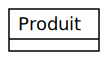

In [3]:
%%mocodo
% Entité
% Pour créer une entité E, écrivez sur une ligne « E: ».

Produit:

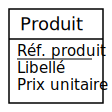

In [4]:
%%mocodo
% Attribut d'entité
% Donnez-lui des attributs en écrivant « E: attr_1, attr_2, ... ».

Produit: Réf. produit, Libellé, Prix unitaire

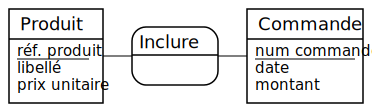

In [5]:
%%mocodo
% Association
% Pour une association A entre plusieurs entités E1, E2, ..., écrivez sur une
% ligne « A, XX E1, XX E2, ... ».

Produit: réf. produit, libellé, prix unitaire
Inclure, XX Commande, XX Produit
Commande: num commande, date, montant

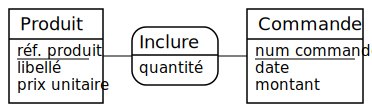

In [6]:
%%mocodo
% Attribut d'association
% Pour ajouter des attributs à une association, mettez un deux-points au bout
% de la ligne, puis énumérez ces attributs en les séparant par des virgules.

Produit: réf. produit, libellé, prix unitaire
Inclure, XX Commande, XX Produit: quantité
Commande: num commande, date, montant

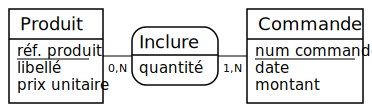

In [7]:
%%mocodo
% Cardinalités
% Si vous connaissez le couple de cardinalités d'une patte, mettez 01, 11, 0N
% ou 1N à la place du XX de l'entité distinguée par cette patte.

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité
Commande: num commande, date, montant

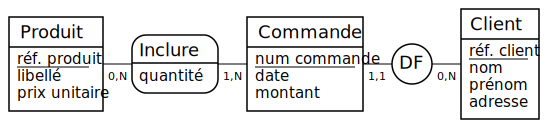

In [8]:
%%mocodo
% Association de dépendance fonctionnelle
% Si votre association a une cardinalité 11, mais aucun attribut, vous pouvez
% la nommer « DF » : Mocodo la figurera par un cercle.

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité
Commande: num commande, date, montant
DF, 0N Client, 11 Commande
Client: réf. client, nom, prénom, adresse

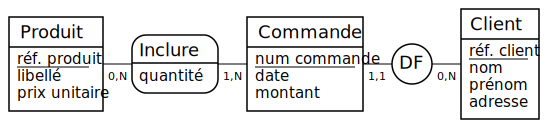

In [9]:
%%mocodo
% Explication interactive des cardinalités
% Le survol d'une cardinalité suivie d'un texte entre crochets affiche celui-
% ci dans un bandeau en haut ou en bas du diagramme. Essayez !

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N [Une commande inclut au moins un produit.] Commande, 0N [Un produit peut être commandé un nombre quelconque de fois.] Produit: quantité
Commande: num commande, date, montant
DF, 0N [Un client peut passer zéro (prospect) ou plusieurs commandes.] Client, 11 [Une commande est passée par un et un seul client.] Commande
Client: réf. client, nom, prénom, adresse

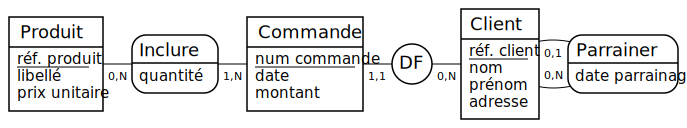

In [10]:
%%mocodo
% Association réflexive
% En répétant le nom d'une entité dans la définition d'une association, vous
% rendez celle-ci réflexive.

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité
Commande: num commande, date, montant
DF, 0N Client, 11 Commande
Client: réf. client, nom, prénom, adresse
Parrainer, 01 Client, 0N Client : date parrainage

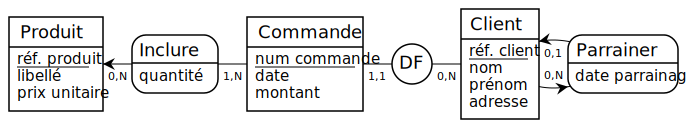

In [11]:
%%mocodo
% Flèche sur une patte
% En suffixant de « < » ou « > » des cardinalités, vous créez une flèche dont
% la direction se lit allant de l'association à l'entité.

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N> Produit: quantité
Commande: num commande, date, montant
DF, 0N Client, 11 Commande
Client: réf. client, nom, prénom, adresse
Parrainer, 01> Client, 0N< Client : date parrainage

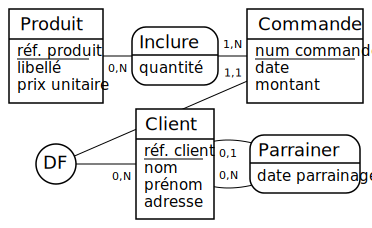

In [12]:
%%mocodo
% Schéma sur plusieurs rangées
% Les boîtes (entités et association) définies sur des lignes consécutives
% sont alignées horizontalement sur la même rangée d'une grille invisible.
% Pour créer une nouvelle rangée, sautez une ligne entre deux clauses.

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité
Commande: num commande, date, montant

DF, 0N Client, 11 Commande
Client: réf. client, nom, prénom, adresse
Parrainer, 01 Client, 0N Client : date parrainage

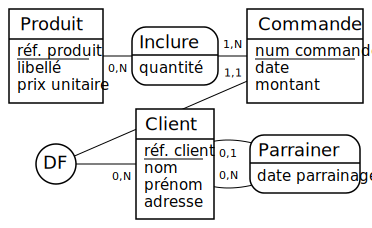

In [13]:
%%mocodo
% Réarrangement automatique
% Quand le schéma commence à devenir confus, cliquez sur les deux flèches
% croisées (à gauche) pour réordonner automatiquement les définitions de façon
% à interdire les croisements et minimiser la longueur des pattes. Essayez !

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité
Commande: num commande, date, montant

DF, 0N Client, 11 Commande
Client: réf. client, nom, prénom, adresse
Parrainer, 01 Client, 0N Client : date parrainage

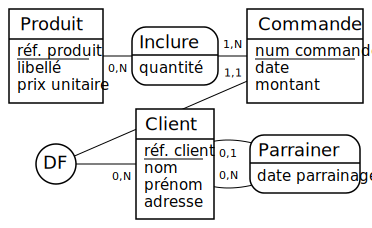

In [14]:
%%mocodo
% Réarrangement automatique minimal
% Quand le schéma commence à prendre trop de place, maintenez ALT en cliquant
% sur les deux flèches croisées pour chercher un réarrangement sur la plus
% petite grille équilibrée possible. Essayez !

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité
Commande: num commande, date, montant

DF, 0N Client, 11 Commande
Client: réf. client, nom, prénom, adresse
Parrainer, 01 Client, 0N Client : date parrainage

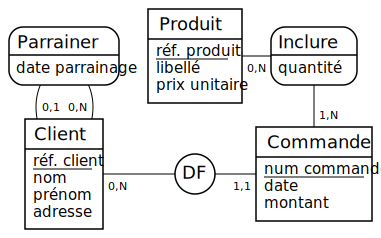

In [15]:
%%mocodo
% Explication des cardinalités
% Si vous insérez un court message entre crochets entre les cardinalités et le
% le nom de l'entité, celui-ci apparaîtra au survol. Essayez en survolant les
% cardinalités de l'association réflexive Parrainer !

Parrainer, 01 [Un client peut avoir été parrainé ou non.] Client, 0N [Un client peut parrainer d'autres clients.] Client : date parrainage
Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité

Client: réf. client, nom, prénom, adresse
DF, 0N Client, 11 Commande
Commande: num commande, date, montant

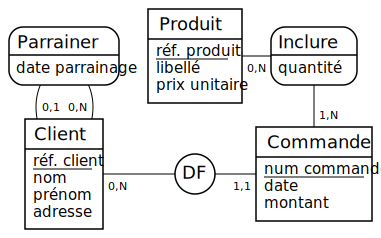

In [16]:
%%mocodo
% Rôle d'une patte pour le MLD
% La même syntaxe sert à « préserver » la sémantique d'une association appelée
% à disparaître lors du passage au relationnel. Ici, notez le rôle « parrain »
% et ce qu'il devient dans le MLD textuel généré sous le MCD.

Parrainer, 01 Client, 0N [parrain] Client : date parrainage
Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité

Client: réf. client, nom, prénom, adresse
DF, 0N Client, 11 Commande
Commande: num commande, date, montant

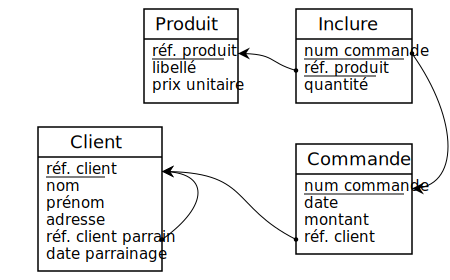

In [17]:
%%mocodo
% MLD sous forme de diagramme relationnel
% Si vous avez coché la case « diagramme relationnel » sous l'onglet Options,
% vous pouvez copier le texte généré sous l'onglet Relations, puis le coller
% sous l'onglet Entrée pour visualiser son équivalent graphique.
%
% NB. Ce type d'entrée n'est pas censé être écrit à la main, mais généré.

::
Produit: réf. produit, libellé, prix unitaire
:
Inclure: #num commande > Commande > num commande, _#réf. produit > Produit > réf. produit, quantité
:

:
Client: réf. client, nom, prénom, adresse, #réf. client parrain > Client > réf. client, date parrainage
::
Commande: num commande, date, montant, #réf. client > Client > réf. client
:

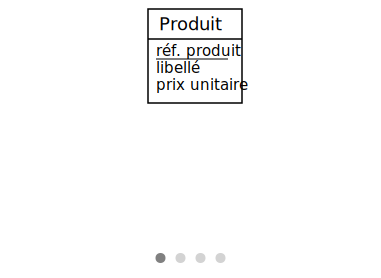

In [18]:
%%mocodo
% Dévoilement progressif du schéma
% Indentez (i.e., insérez des espaces au début de) certaines clauses pour
% créer des calques. Les boîtes définies avec la même indentation sont tracées
% sur le même calque. Les calques sont ordonnés par indentation croissante.

      Parrainer, 01 Client, 0N Client : date parrainage
Produit: réf. produit, libellé, prix unitaire
  Inclure, 1N Commande, 0N Produit: quantité
 
    Client: réf. client, nom, prénom, adresse
    DF, 0N Client, 11 Commande
  Commande: num commande, date, montant

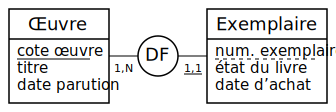

In [19]:
%%mocodo
% Entité faible (ou identification relative)
% Préfixez de « _ » une cardinalité 11 pour « affaiblir » l'entité distinguée,
% dont l'identifiant sera alors souligné en pointillés.
%
% NB. De façon non conventionnelle, Mocodo souligne le 11 pour signifier que
% le « renforcement » de l'identifiant va passer par là. Voir la documentation
% pour des représentations alternatives.

Œuvre: cote œuvre, titre, date parution
DF, 1N Œuvre, _11 Exemplaire
Exemplaire: num. exemplaire, état du livre, date d'achat

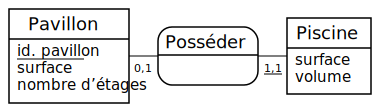

In [20]:
%%mocodo
% Entité sans identifiant
% Préfixez d'un « _ » le premier attribut pour l'exclure de l'identifiant, p.
% ex. pour une entité faible sans discriminant.

Pavillon: id. pavillon, surface, nombre d'étages
Posséder, 01 Pavillon, _11 Piscine
Piscine: _surface, volume

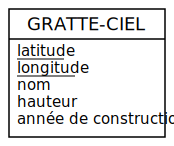

In [21]:
%%mocodo
% Identifiant composite
% Inversement, si vous voulez inclure dans l'identifiant un attribut autre que
% le premier, préfixez le de « _ ».

GRATTE-CIEL: latitude, _longitude, nom, hauteur, année de construction

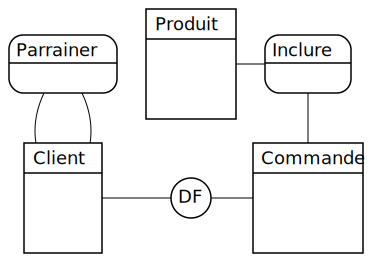

In [22]:
%%mocodo
% MCD vide
% Remplacez les cardinalités par XX et les attributs par des suites d'espaces
% insécables pour créer un « squelette » de MCD à remplir.

Parrainer, XX Client, XX Client
Produit: _           ,,,
Inclure, XX Commande, XX Produit
 
Client: _            ,,,
DF, XX Client, XX Commande
Commande: _            ,,,

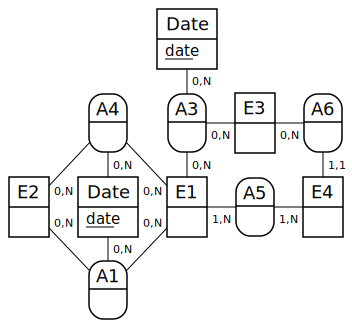

In [23]:
%%mocodo
% Boîtes homonymes
% L'éventuel dernier chiffre d'un nom d'entité ou d'association n'est pas
% affiché. C'est bon à savoir, p. ex. pour monnayer une entité « fictive »
% trop pattue : ici, on évite les croisements en créant deux entités Date.

Date1: date

:
A40, 0N E10, 0N E20, 0N Date2
A30, 0N E30, 0N E10, 0N Date1
E30: _         
A60, 11 E40, 0N E30

E20: _         
Date2: date
E10: _         
A50, 1N E40, 1N E10
E40: _         

A10, 0N E10, 0N E20, 0N Date2         
:
:

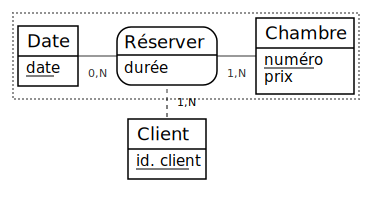

In [24]:
%%mocodo
% Agrégation (ou pseudo-entité)
% Préfixez de « / » une cardinalité pour créer une pseudo-entité avec
% l'association et les autres entités que celle-ci met en jeu.
%
% NB. La représentation conventionnelle (non prise en charge par Mocodo)
% insérerait une association entre Client et Réserver.

Date: date
Réserver, /1N Client, 1N Chambre, 0N Date: durée
Chambre: numéro, prix

Client: id. client

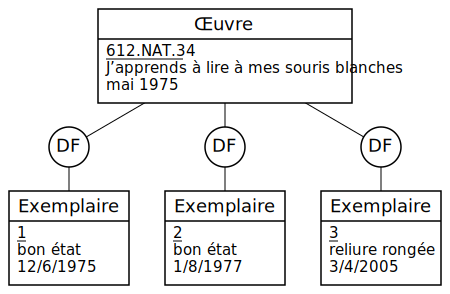

In [25]:
%%mocodo
% Vue en extension
% Combiner l'astuce du dernier chiffre et celui des cardinalités « XX »
% permet de créer une vue en extension.

Œuvre: 612.NAT.34, J'apprends à lire à mes souris blanches, mai 1975

DF1, XX Œuvre, XX Exemplaire1
DF2, XX Œuvre, XX Exemplaire2
DF3, XX Œuvre, XX Exemplaire3

Exemplaire1: 1, bon état, 12/6/1975
Exemplaire2: 2, bon état, 1/8/1977
Exemplaire3: 3, reliure rongée, 3/4/2005

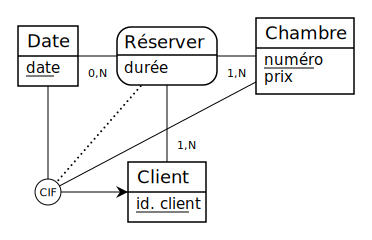

In [26]:
%%mocodo
% Contrainte d'intégrité fonctionnelle (CIF)
% Le même cas de figure peut aussi être rendu visuellement par une CIF.
%
% NB. Le paragraphe réduit à « : » permet d'ajouter une rangée vide à la
% grille sous-jacente, de façon à aérer verticalement le MCD. Les deux noms
% de boîtes qui suivent le « : » de la définition de la contrainte alignent
% celle-ci sur l'abcisse et l'ordonnée (respectivement) de ces boîtes.

Date: date
Réserver, /1N Client, 1N Chambre, 0N Date: durée
Chambre: numéro, prix

:
    
Client: id. client
    
(CIF) ->Client, --Chambre, --Date, ..Réserver: Date, Client

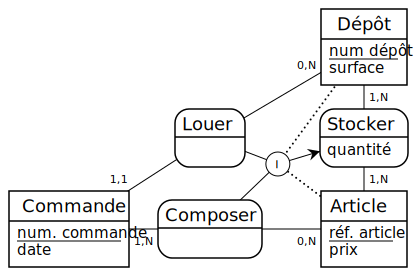

In [27]:
%%mocodo
% Contrainte sur associations
% Ajoutez à votre MCD diverses contraintes sous forme de lettres entourées et
% liées aux boîtes par des traits fléchés ou non, pleins ou pointillés, ou
% même invisibles.
%
% NB : par défaut, le centre de la contrainte coïncide avec le barycentre des
% boîtes qu'elle met en jeu.
%
% Source du MCD : Merise, deuxième génération (Nanci et Espinasse, 2001).

:::
Dépôt: num dépôt, surface

:
Louer, 11 Commande, 0N Dépôt
:
Stocker, 1N Dépôt, 1N Article: quantité

Commande: num. commande, date
Composer, 1N Commande, 0N Article
:
Article: réf. article, prix

(I) ->Stocker, ..Dépôt, ..Article, --Composer, --Louer, Commande, Stocker

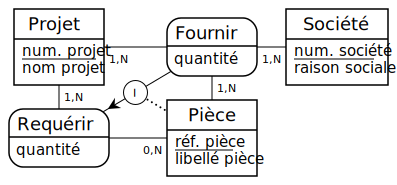

In [28]:
%%mocodo
% Explication interactive d'une contrainte
% Le survol d'une contrainte suivie d'un texte entre crochets affiche celui-ci
% dans un bandeau en haut ou en bas du diagramme. Essayez !

Projet: num. projet, nom projet
:
Fournir, 1N Projet, 1N Pièce, 1N Société: quantité
Société: num. société, raison sociale

Requérir, 1N Projet, 0N Pièce: quantité
:
Pièce: réf. pièce, libellé pièce

(I) [Toute pièce fournie doit avoir été requise.] ..Pièce, ->Requérir, --Fournir, Projet

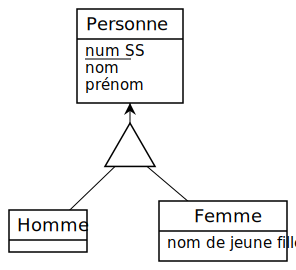

In [29]:
%%mocodo
% Héritage (ou spécialisation)
% Pour spécialiser une entité E en une ou plusieurs autres entités E1, E2, ...
% écrivez « /\ E <- E1, E2, ... ».
%
% NB. Vous pouvez insérer X (exclusion) et/ou T (totalité) entre les barres
% obliques, ajouter une liste d'attributs ou modifier la sémantique et/ou la
% représentation graphique de l'héritage en remplaçant la flèche par <=, ->,
% =>, <<=, <<-, ->> =>>. Voir la documentation.

Personne: num SS, nom, prénom

/\ Personne <- Homme, Femme

Homme: 
:
Femme: nom de jeune fille

In [30]:
from pathlib import Path
import os
import re

def boxed_text(lines):
    width = len(max(lines, key=len))
    lines[0] = " " * max(0, (width - len(lines[0])) // 2) + lines[0].upper()
    lines[0:0] = [""]
    lines[2:2] = [""]
    lines.append("")
    result = []
    result.append("%" * (width + 6))
    for line in lines:
        spaces = " " * (width - len(line))
        result.append("%  " + line + spaces + "  %")
    result.append("%" * (width + 6))
    result.append("")
    return "\n".join(result)


os.system("rm tutorial_box/*.mcd")
path = Path("tutorial.ipynb")
doc = json.loads(path.read_text())
cells = []
i = 0
titles = []
for cell in doc["cells"]:
    if cell["cell_type"] == "code":
        source = cell["source"]
        if source and source[0].startswith("%%mocodo"):
            title = source[1][1:].strip()
            print(f"{i}. {title}")
            titles.append(f'"{title}"')
            lines = []
            for (j, line) in enumerate(source[1:]):
                if not line.startswith("%"):
                    text = boxed_text(lines) + "".join(source[j+1:])
                    break
                lines.append(line[2:-1])
            Path(f"tutorial_box/tuto-{i:04d}.mcd").write_text(text)
            Path(f"../web/box/tuto-{i:04d}.mcd").write_text(text)
            i += 1
print(f"Updated {i} files in tutorial_box folder.")
js_path = Path("../web/mocodo.js")
code = js_path.read_text()
(code, n) = re.subn(r'(?<=createOptions\("tutorial", )\[.+?\]', f"[{', '.join(titles)}]", code)
if n == 0:
    print("Warning: unable to update mocodo.js!")
else:
    js_path.write_text(code)
    print("Updated mocodo.js.")
os.system("open tutorial_box");

0. MCD d'accueil
1. Entité
2. Attribut d'entité
3. Association
4. Attribut d'association
5. Cardinalités
6. Association de dépendance fonctionnelle
7. Explication interactive des cardinalités
8. Association réflexive
9. Flèche sur une patte
10. Schéma sur plusieurs rangées
11. Réarrangement automatique
12. Réarrangement automatique minimal
13. Explication des cardinalités
14. Rôle d'une patte pour le MLD
15. MLD sous forme de diagramme relationnel
16. Dévoilement progressif du schéma
17. Entité faible (ou identification relative)
18. Entité sans identifiant
19. Identifiant composite
20. MCD vide
21. Boîtes homonymes
22. Agrégation (ou pseudo-entité)
23. Vue en extension
24. Contrainte d'intégrité fonctionnelle (CIF)
25. Contrainte sur associations
26. Explication interactive d'une contrainte
27. Héritage (ou spécialisation)
Updated 28 files in tutorial_box folder.
Updated mocodo.js.
